Dataset Preview:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abb

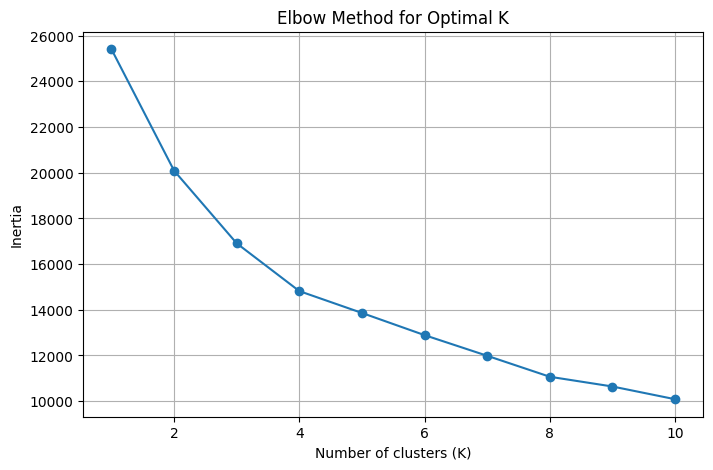


Cluster counts:
Cluster
3    647
2    631
1    575
4    508
0    462
Name: count, dtype: int64


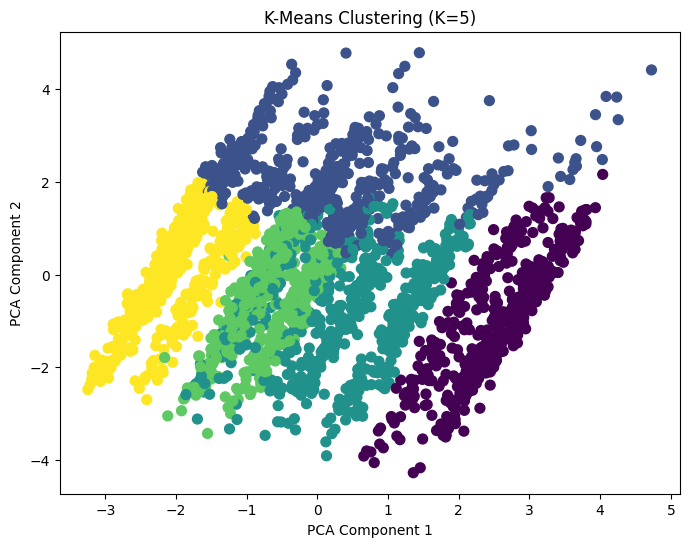

In [5]:
# K-Means Clustering on sales_data_sample.csv
# ----------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Display first few rows
print("Dataset Preview:")
print(data.head())

# ------------------------------
# Step 1: Data Preprocessing
# ------------------------------

# Select only numerical columns for clustering
numeric_data = data.select_dtypes(include=[np.number])

# Drop missing values
numeric_data = numeric_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# ------------------------------
# Step 2: Determine Optimal K using Elbow Method
# ------------------------------

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# ------------------------------
# Step 3: Apply K-Means with optimal K (choose visually, e.g., K=3 or 4)
# ------------------------------

optimal_k = 5  # Change based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original data
data['Cluster'] = clusters

print("\nCluster counts:")
print(data['Cluster'].value_counts())

# ------------------------------
# Step 4: Visualize Clusters (optional for 2D)
# ------------------------------

from sklearn.decomposition import PCA

pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


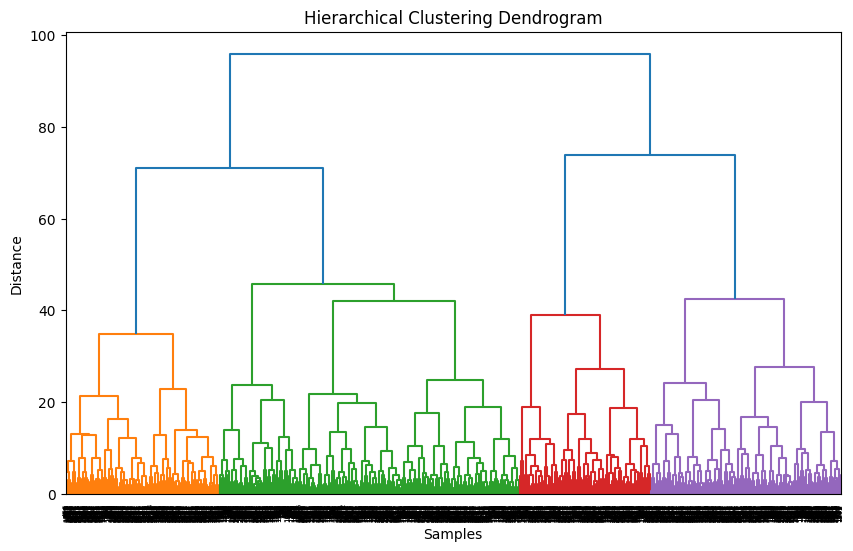

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
